In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
stuDF.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


compare math scores between two groups:

 - Group 1: Students who completed the test preparation course

 - Group 2: Students who did not

Hypotheses:

 - Null Hypothesis (H₀): There is no difference in mean math scores between students who completed and didn’t complete the test preparation course.

 - Alternative Hypothesis (H₁): There is a difference in mean math scores between the two groups.

In [ ]:
completed = df[df['test preparation course'] == 'completed']['math score']
not_completed = df[df['test preparation course'] == 'none']['math score']


In [ ]:
from scipy.stats import ttest_ind

completed = df[df['test preparation course'] == 'completed']['math score']
not_completed = df[df['test preparation course'] == 'none']['math score']
t_stat_math, p_val_math = ttest_ind(completed, not_completed, equal_var=False)

print(f"t-statistic: {t_stat_math:.3f}")
print(f"p-value: {p_val_math:.10f}")

t-statistic: 5.787
p-value: 0.0000000104


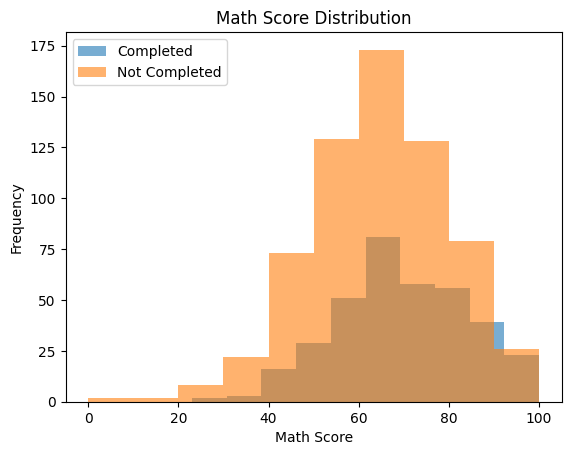

In [ ]:
import matplotlib.pyplot as plt
plt.hist(completed, alpha=0.6, label='Completed')
plt.hist(not_completed, alpha=0.6, label='Not Completed')
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
score_df = df[['math score', 'reading score', 'writing score']]
correlation_matrix = score_df.corr(method='pearson')
print(correlation_matrix)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


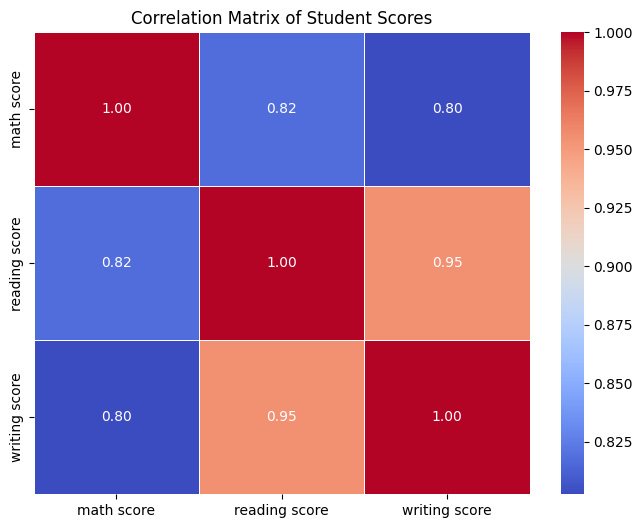

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Student Scores')
plt.show()


From the matrix:

Reading ↔ Writing: 0.95

This is the strongest positive correlation → highly related language skills.


In [ ]:
import statsmodels.formula.api as smf


In [ ]:
# Fit regression model with reading score and test prep as predictors
df['test_prep_binary'] = df['test preparation course'].map({'none': 0, 'completed': 1})

model = smf.ols('Q("math score") ~ Q("reading score") + test_prep_binary', data=df).fit()


In [ ]:
# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Q("math score")   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1007.
Date:                Mon, 12 May 2025   Prob (F-statistic):          5.32e-240
Time:                        17:38:41   Log-Likelihood:                -3584.7
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     997   BIC:                             7190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.2292      1

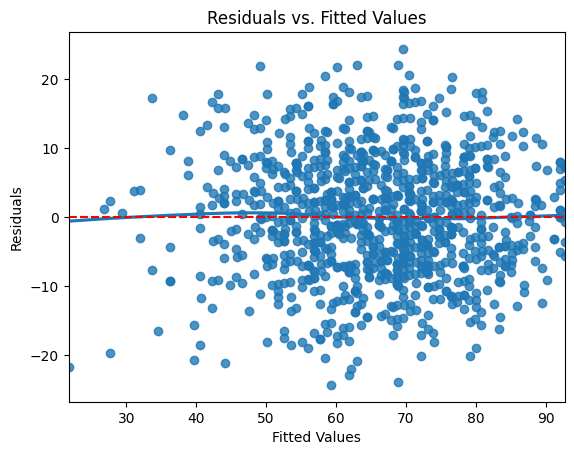

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(0, color='red', linestyle='--')
plt.show()
